## Import things

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

## Load images

read_pgm stolen from https://stackoverflow.com/questions/7368739/numpy-and-16-bit-pgm/7369986

In [2]:
import re

def read_pgm(filename, byteorder='>'):
    """Return image data from a raw PGM file as numpy array.

    Format specification: http://netpbm.sourceforge.net/doc/pgm.html

    """
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    return np.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).reshape((int(height), int(width)))


In [3]:
cover_images_path = "../data/raw/boss/cover"
hugo_images_path = "../data/raw/boss/stego"

[[125 125 125 ...  48  42  36]
 [125 124 125 ...  58  57  44]
 [124 125 124 ...  53  53  52]
 ...
 [ 77  76  83 ...  47  45  48]
 [ 69  73  83 ...  60  66  74]
 [ 82  82  78 ...  67  62  55]]


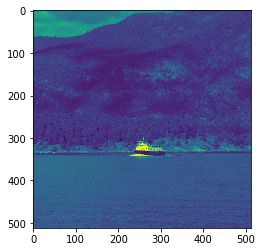

In [4]:
image1 = read_pgm(cover_images_path + "/155.pgm")
plt.imshow(image1)
print(image1)

[[125 125 125 ...  48  42  36]
 [125 124 125 ...  58  57  45]
 [124 125 124 ...  52  53  52]
 ...
 [ 77  76  83 ...  47  45  48]
 [ 69  73  83 ...  59  66  75]
 [ 82  82  78 ...  66  63  56]]


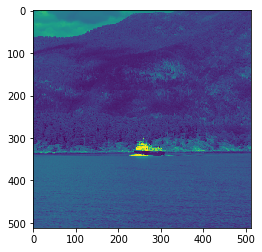

In [5]:
image2 = read_pgm(hugo_images_path + "/155.pgm")
plt.imshow(image2)
print(image2)

In [6]:
cover_images = []
failed_cover = []

hugo_images = []
failed_hugo = []


percentage = .1

for i in tqdm(range(1, int(10001*percentage)+1)):
    try:
        image = read_pgm(cover_images_path + "/" + str(i) + ".pgm")
        cover_images.append(image)
    except:
        failed_cover.append(i)
        
for i in tqdm(range(1, int(10001*percentage)+1)):
    try:
        image = read_pgm(hugo_images_path + "/" + str(i) + ".pgm")
        hugo_images.append(image)
    except:
        failed_hugo.append(i)

100%|██████████| 1000/1000 [00:01<00:00, 828.48it/s]


In [7]:
print(len(failed_cover))
print(failed_cover)
print(len(failed_hugo))
print(failed_hugo)

3
[151, 439, 964]
2
[360, 964]


## Make usable datasets

In [8]:
# get same number in both sets
# TODO: these are not removing the same images in both

hugo_images.pop(0)
print(len(cover_images))
print(len(hugo_images))


997
997


In [9]:
split = .8

split_index = int(len(cover_images)*split)
rem_count = len(cover_images) - split_index

# make training data

# add cover images based on split
x_train = cover_images[0:split_index]
y_train = [(1,0)]*split_index

# add hugo images based on split
x_train.extend(hugo_images[0:split_index])
y_train.extend([(0,1)]*split_index)


# make test data

# add cover images based on split
x_test = cover_images[split_index:]
y_test = [(1,0)]*rem_count

# add hugo images based on split
x_test.extend(hugo_images[split_index:])
y_test.extend([(0,1)]*rem_count)


In [10]:
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

1594 1594
400 400


randomization code stolen from https://tech.pic-collage.com/tips-of-numpy-shuffle-multiple-arrays-e4fb3e7ae2a

In [11]:
def randomize(a, b):
    # Generate the permutation index array.
    permutation = np.random.permutation(a.shape[0])
    # Shuffle the arrays by giving the permutation in the square brackets.
    shuffled_a = a[permutation]
    shuffled_b = b[permutation]
    return shuffled_a, shuffled_b

In [12]:
# numpyify data
x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

# shuffle training data
#x_train, y_train = randomize(x_train, y_train)

# normalize data
x_train = x_train.astype("float32") / 255
mean = np.mean(x_train)
std = np.std(x_train)

x_train = x_train - mean
x_train = x_train * (1/std)


x_test = x_test.astype("float32") / 255

[[[ 2.4778686   2.4778686   2.4778686  ...  2.4778686   2.4778686
    2.4778686 ]
  [ 2.4778686   2.4778686   2.4778686  ...  2.4778686   2.4778686
    2.4778686 ]
  [ 2.4778686   2.4778686   2.4778686  ...  2.4778686   2.4778686
    2.4778686 ]
  ...
  [ 0.647013    0.4805715   0.7377992  ...  0.4805715   0.49570253
    0.49570253]
  [ 0.81345445  0.46544045  0.4805715  ...  0.26873696  0.1628197
    0.26873696]
  [ 0.02664036  0.02664036  0.13255763 ...  0.283868    0.31413007
   -0.06414587]]

 [[ 0.02664036  0.0417714   0.02664036 ...  0.0417714   0.0417714
    0.0417714 ]
  [ 0.05690243  0.05690243  0.05690243 ...  0.0417714   0.0417714
    0.0417714 ]
  [ 0.07203347  0.05690243  0.07203347 ...  0.0417714   0.0417714
    0.0417714 ]
  ...
  [-1.1535807  -1.1989738  -1.1838428  ... -1.2141049  -1.1838428
   -1.1989738 ]
  [-1.1838428  -1.274629   -1.274629   ... -1.1838428  -1.1838428
   -1.1838428 ]
  [-1.2141049  -1.28976    -1.28976    ... -1.1535807  -1.1687118
   -1.1535807 ]]

In [13]:
# get the data into the right shape
w, h = 512, 512
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# print shape information
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1594, 512, 512, 1)
(400, 512, 512, 1)
(1594, 2)
(400, 2)


In [14]:
print(y_train)

[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]


In [15]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=1, kernel_size=3, padding='valid', activation='tanh', input_shape=(512,512,1)))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=8))
#model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=509, padding='valid', activation='tanh'))
#model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=509, padding='same', activation='tanh'))

#model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
#model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten()) # note that in the paper they use reshape to 64x4 instead of flattening
model.add(tf.keras.layers.Dense(2))
model.add(tf.keras.layers.Activation(tf.nn.log_softmax))
#model.add(tf.keras.layers.Softmax())


#model.add(tf.keras.layers.Dropout(0.5))
#model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 510, 510, 1)       10        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 64)          16581248  
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 514       
_________________________________________________________________
activation (Activation)      (None, 2)                 0         
Total params: 16,581,772
Trainable params: 16,581,772
Non-trainable params: 0
_________________________________________________________________


In [16]:
sgd = tf.keras.optimizers.SGD(lr=.5, decay=5e-7, momentum=0)

# compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])

In [18]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best', verbose=1, save_best_only=True)

model.fit(x_train, y_train, batch_size=10, epochs=1, callbacks=[checkpointer], shuffle=True)

Epoch 1/1
1594/1594 [==============================] - 179s 113ms/step - loss: 7.9416 - acc: 0.5201


/usr/lib/python3.7/site-packages/keras/callbacks.py:434: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
